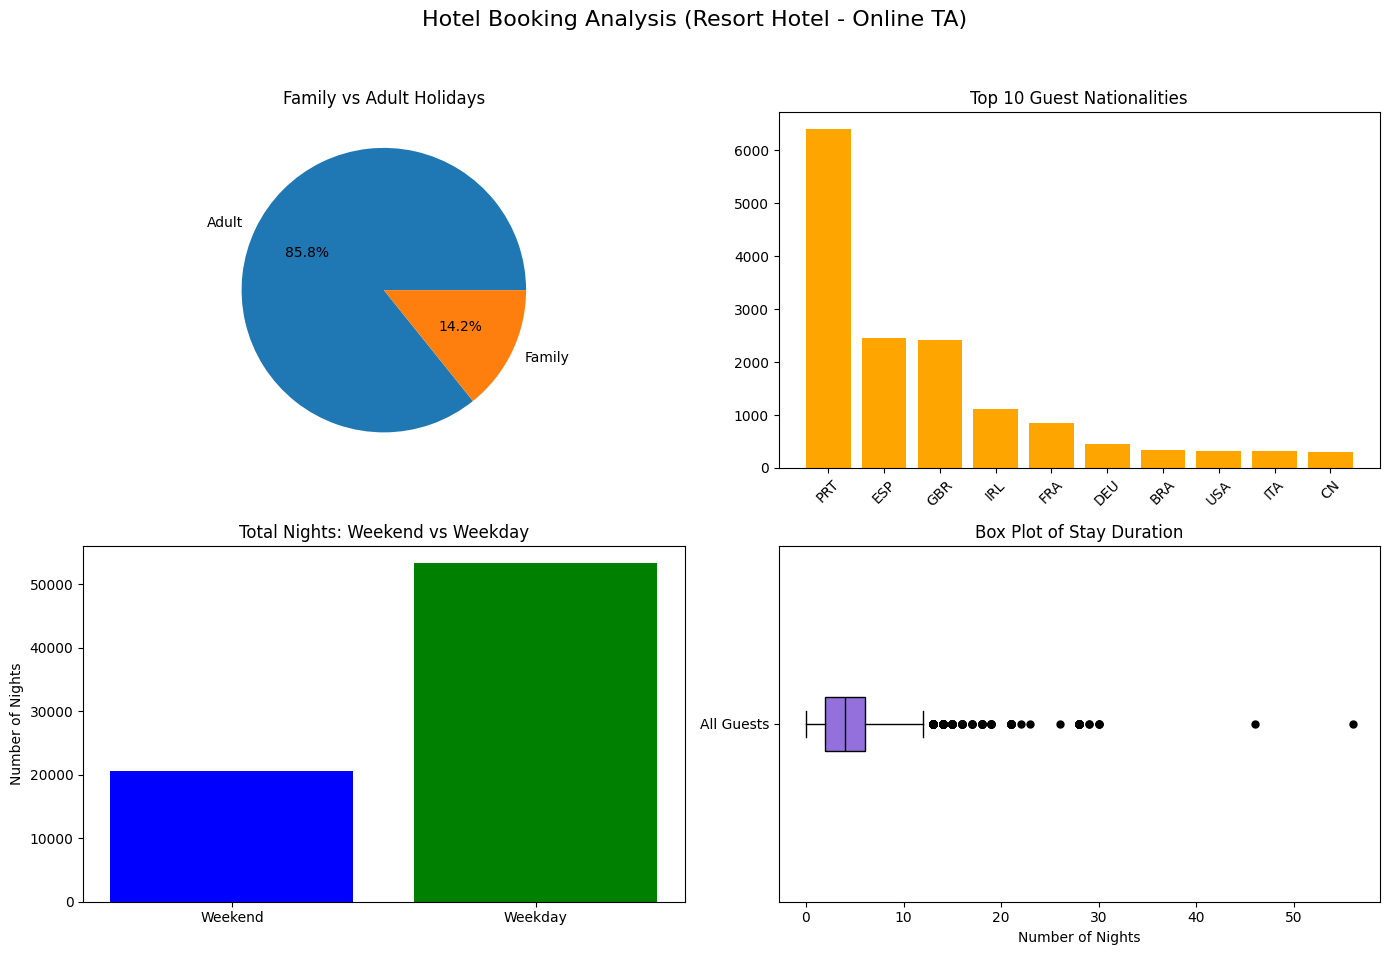

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumes 'hotel_bookings(1).csv' is in the same folder as this notebook
# Load dataset
#bookings = pd.read_csv("hotel_bookings(1).csv")
bookings = pd.read_csv("hotel_bookings.csv")

# Focusing only on Resort Hotel guests who booked via Online Travel Agent
resort_data = bookings[
    (bookings['hotel'] == 'Resort Hotel') &
    (bookings['market_segment'] == 'Online Travel Agent')
]

# Column Selection
resort_data = resort_data[['country', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']]

# add total number of kids per booking
resort_data['num_kids'] = resort_data['children'] + resort_data['babies']

# add total stay duration (weekend + weekday)
resort_data['total_nights'] = resort_data['stays_in_weekend_nights'] + resort_data['stays_in_week_nights']

# classify as Family or Adult booking
resort_data['group_type'] = 'Adult'
resort_data.loc[resort_data['num_kids'] > 0, 'group_type'] = 'Family'

# count number of each group type
group_counts = resort_data['group_type'].value_counts()

# top 10 countries of origin
top_countries = resort_data['country'].value_counts().nlargest(10)

# total weekend and weekday stays
weekend_nights = resort_data['stays_in_weekend_nights'].sum()
weekday_nights = resort_data['stays_in_week_nights'].sum()

# start plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hotel Booking Analysis (Resort Hotel - Online TA)', fontsize=16)

# Pie chart: Family vs Adult
axs[0, 0].pie(group_counts, labels=group_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Family vs Adult Holidays')

# Bar chart: Top nationalities
axs[0, 1].bar(top_countries.index, top_countries.values, color='orange')
axs[0, 1].set_title('Top 10 Guest Nationalities')
axs[0, 1].tick_params(axis='x', rotation=45)

# Bar chart: Weekend vs Weekday stays
axs[1, 0].bar(['Weekend', 'Weekday'], [weekend_nights, weekday_nights], color=['blue', 'green'])
axs[1, 0].set_title('Total Nights: Weekend vs Weekday')
axs[1, 0].set_ylabel('Number of Nights')

# Box plot: Stay duration
axs[1, 1].boxplot(resort_data['total_nights'], vert=False, patch_artist=True,
                  boxprops=dict(facecolor='mediumpurple', color='black'),
                  medianprops=dict(color='black'),
                  whiskerprops=dict(color='black'),
                  capprops=dict(color='black'),
                  flierprops=dict(marker='o', markerfacecolor='black', markersize=5, linestyle='none'))

axs[1, 1].set_title('Box Plot of Stay Duration')
axs[1, 1].set_xlabel('Number of Nights')
axs[1, 1].set_yticklabels(['All Guests'])

# Plot layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [2]:
resort_data

,country,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,num_kids,total_nights,group_type
4,GBR,0,2,2,0.0,0,0.0,2,Adult
5,GBR,0,2,2,0.0,0,0.0,2,Adult
8,PRT,0,3,2,0.0,0,0.0,3,Adult
10,PRT,0,4,2,0.0,0,0.0,4,Adult
11,PRT,0,4,2,0.0,0,0.0,4,Adult
...,...,...,...,...,...,...,...,...,...
40042,GBR,2,5,2,0.0,0,0.0,7,Adult
40043,ITA,2,5,2,1.0,0,1.0,7,Family
40044,CN,2,5,2,1.0,0,1.0,7,Family
40046,CN,2,5,2,1.0,0,1.0,7,Family


**Business Question:**  
How should the resort hotel tailor its online marketing strategy based on guest profiles?

**Relevance:**  
Understanding guest demographics, origins, and stay patterns allows the hotel to optimize marketing campaigns, tailor packages, and improve online targeting for advertisements.

**Data Justification:**  
Only bookings from the Resort Hotel via Online Travel Agent were included to reflect the desire of investigating online resort hotel bookings. Relevant data such as number of children, country of origin, and length of stay help distinguish between adult holidays, family trips, short breaks, and longer vacations. This data is ideal to determine customer demographic and what packages are most desired.

**Findings and Insights:**  
The majority of bookings are from adult guests (86%), but family holidays still make up a considerable portion. Portugal, Spain, and the UK represent the top nationalities. Weekday nights account for most of the stay duration, yet weekend bookings remain proportionally strong given only 2/7 nights are weekends. The stay duration box plot reveals that most guests stay between 3–7 nights. These insights suggest marketing efforts should focus on mid-length stay adult/couple packages in europe, with a potential focus on southern europe. While adult-focused marketing shows the greatest potential, parent-targeted campaigns may be worth piloting — with further investment guided by data-driven results.

Overall mark: 63

#### Business Question:
A relevant business question is clearly identified. The significance of answering it is also explained. Comprehensive evidences are presented to support the analysis. The findings and implications are well data-supported, despite the logic of the analysis is not always clear.

<u>Very Good</u>

#### Data:
A wide range of variables including: 'country', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', are selected to answer the question. The rationale of choosing these variables are addressed, though it is not convincing enough. Basic data conditioning and variable transformation are effectively applied, showing good data manipulation skill.

<u>Good</u>

#### Visualization:
Multiple plots are used for the visualization purpose, which includes pie chart, bar chart and box plot, showing good visualization technique. The plots come with essential elements of title, axis labels and ticks. The plots are also meaningful and supportive for the findings and implications. Improvements could include explaining the outliers in the boxplot.

<u>Very Good</u>

#### Code:
The structure of the code is clean. There is no obvious errors, except a minor issue in importing the data file (you should use the file name 'hotel_bookings.csv' as provided, instead of the file with a modified name that only exists on your machine). However, the readability of the code is low, as all code are put in one cell. Consider to separate code according to functionality to make the script more readale.

<u>Good</u>